# Data Interface for Implicit emulation

In [42]:
import time, os, shutil, subprocess
import math, array, random

import cosyHelp as cosy

from CosyIO import CosyIO
from Emulator import Emulator
from NonRedundant import NonRedundant

from CosyMagnet import CosyMagnet

from SECARMagnet import SECARMagnet
from StaticSECARMagnet import StaticSECARMagnet
from SECAR import SECAR

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import scipy as sp
from scipy.interpolate import CubicSpline
from scipy.stats import gaussian_kde
from scipy.special import rel_entr

In [43]:
''' Dynamic Magents require several current files to build emulators '''
dynamic_magnets = [ 
                    SECARMagnet(path="MagnetData/Q1/train",cutoff=3),
                    SECARMagnet(path="MagnetData/Q2/train",cutoff=3),
                    SECARMagnet(path="MagnetData/S1/train",cutoff=3),
                    SECARMagnet(path="MagnetData/Q3/train",cutoff=3),
                    SECARMagnet(path="MagnetData/Q4/train",cutoff=3),
                    SECARMagnet(path="MagnetData/Q5/train",cutoff=3),
                  ]

''' SECAR instance using emulated magnets, dipoles which are lookup tables '''
dynamic_secar = SECAR(magnets=dynamic_magnets)

### Now that we've built all the magnet instances, we can extract the principal componenets of each

50

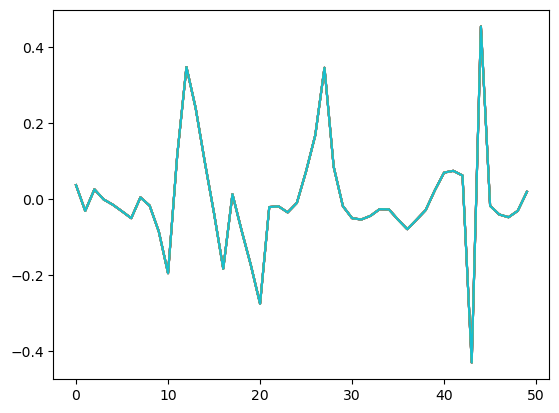

In [44]:
''' 
    Each magnet instance has in it the real 
    

'''
for i in range(10):
    plt.plot(dynamic_magnets[0].u.T[12])

dynamic_magnets[0].height

In [45]:
class PCIO:
    def __init__(self,**kwargs):
        pass

    def buildFromInstance(self,**kwargs):
        self.instance = kwargs["instance"]
        

    def buildFromFile(self,**kwargs):
        self.path = kwargs["path"]

    def write(self,**kwargs):
        filename = kwargs["filename"]
        numpcs   = kwargs["numpcs"]
        f = open(filename,"w")

        ''' Write header '''
        header = "scale,"
        for pc_index in range(numpcs):
            header += "pc_"+str(pc_index) + (","if pc_index<numpcs-1 else"")
        header += "\n"
        f.write(header)
        
        ''' Write the bulk '''
        for axis_index in range(self.instance.height):
            line = str(self.instance.axis[axis_index]) + ","
            for pc_index in range(numpcs):
                line += str(self.instance.u[axis_index][pc_index]) + (","if pc_index<numpcs-1 else"")
            line += "\n"
            f.write(line)
            
        f.close()

In [48]:
''' Write all magnet pc data '''

pcwriter = PCIO()
magnet_names = ["Q1","Q2","S1","Q3","Q4","Q5"]
numpcs = 10

for magnet_index in range(len(magnet_names)):
    pcwriter.buildFromInstance(instance=dynamic_magnets[magnet_index])
    pcwriter.write(filename = "pc_data/"+magnet_names[magnet_index]+"_data.csv",numpcs = numpcs)